# Haliclona Oculata

http://www.bio.vu.nl/thb/deb/deblab/add_my_pet/entries_web/Haliclona_oculata_par.html

In [1]:
%matplotlib inline

#Import packages we need
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import interpolate
import oct2py

import deb
import deb_compound_pars
import deb_aux

sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)

## Data data data
Input data from AMP.

### Organism volume over time

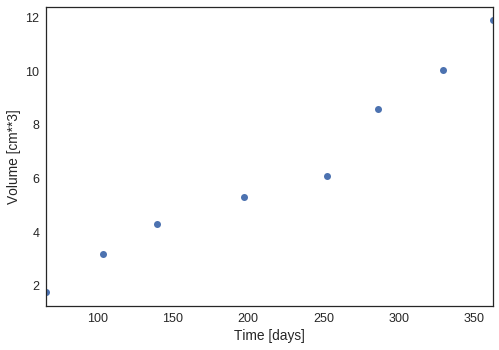

In [2]:
tV = [
    (65.996, 1.753),
    (103.708, 3.165),
    (139.400, 4.299),
    (197.315, 5.303),
    (252.537, 6.071),
    (286.208, 8.555),
    (329.308, 10.01),
    (362.306, 11.87),
]
tV = np.array(tV)
tV = pd.Series(index=tV[:, 0], data=tV[:, 1], name='Volume')
tV.unit = 'cm**3'
ax = tV.plot(ls='none', marker='o')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Volume [cm**3]')

### Environmental temperature over time
Perform smoothed univariate spline interpolation to get dynamic temperature forcing function.

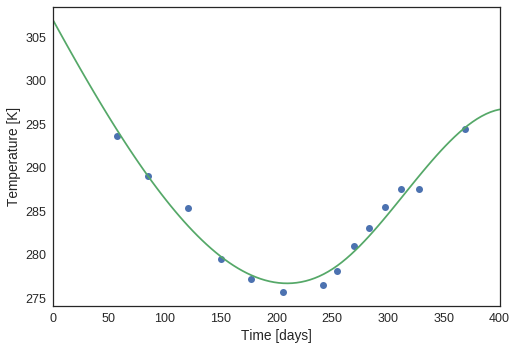

In [3]:
tT = [
    (57.565, 20.455),
    (85.271, 15.909),
    (120.716, 12.184),
    (149.941, 6.376),
    (177.178, 4.040),
    (205.976, 2.525),
    (242.029, 3.346),
    (253.903, 4.924),
    (269.921, 7.828),
    (282.835, 9.912),
    (297.300, 12.374),
    (311.756, 14.394),
    (327.715, 14.394),
    (369.042, 21.275)
]
tT = np.array(tT)
tT = 273.1 + pd.Series(index=tT[:, 0], data=tT[:, 1], name='Temperature')
tT.unit = 'K'

tTi = interpolate.UnivariateSpline(tT.index, tT.values)
tTi2 = interpolate.UnivariateSpline(tT.index, tT.values, s=0, k=3)

t = np.linspace(0., 400, 100)

ax = tT.plot(ls='none', marker='o')
ax.plot(t, tTi(t))
#ax.plot(t, tTi2(t), '--')

ax.set_xlim(0, 400)
ax.set_xlabel('Time [days]')
ax.set_ylabel('{0} [{1}]'.format(tT.name, tT.unit))

### Food level over time


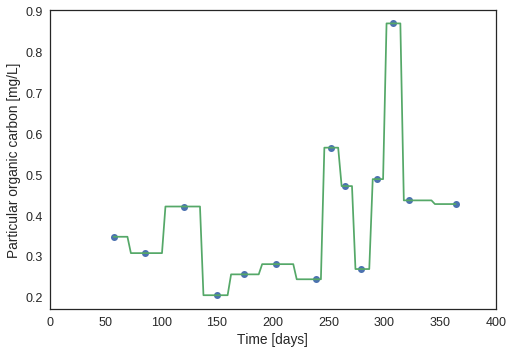

In [4]:
matstr = '''
tX = [ ... % time since 2015/06/01 (d), particulate organic carbon mg/L
57.390	0.347
85.511	0.307
120.519	0.421
149.788	0.204
174.465	0.255
202.586	0.280
238.742	0.243
252.516	0.565
265.142	0.471
279.489	0.268
293.836	0.488
307.610	0.869
321.958	0.436
363.852	0.427];
'''

#Convert matlab matrix to numpy array
oct2py.octave.eval(matstr)
tX = oct2py.octave.pull('tX')
tX = pd.Series(index=tX[:, 0], data=tX[:, 1], name='Particular organic carbon')
tX.unit = 'mg/L'

#Interpolate
tXi = interpolate.interp1d(tX.index, tX.values, kind='nearest', bounds_error=False, fill_value='extrapolate')

t = np.linspace(tX.index[0], tX.index[-1], 100)
ax = tX.plot(ls='none', marker='o')
ax.plot(t, tXi(t))

ax.set_xlim(0, 400)
ax.set_xlabel('Time [days]')
ax.set_ylabel('{0} [{1}]'.format(tX.name, tX.unit))

## Set up DEB parameters

In [5]:
pripars = deb.get_deb_params_pandas()
vals = dict(pAm=81.1027, Fm=6.5, kappaX=0.8, v=0.060315, kappa=0.98229, 
           pM=21.3497, kappaR=0.475, pT=0, kJ=0.002, EG=1532.38, EbH=0.02261,
           EpH=17.94, TA=4000, Ts=293.15)
for k, v in vals.items():
    pripars.loc[k, 'Value'] = v
pripars

,Min,Max,Value,Dimension,Units,Description
Fm,2.220446e-16,NaN,6.500000,l L**-2 t**-1,,Specific searching rate
kappaX,2.220446e-16,1.0,0.800000,-,,Assimilation efficiency
pAm,2.220446e-16,NaN,81.102700,e L**-2 t**-1,,max specific assimilation rate
v,2.220446e-16,NaN,0.060315,L t**-1,cm/d,Energy conductance
kappa,2.220446e-16,1.0,0.982290,-,,Allocation fraction to soma
kappaR,2.220446e-16,1.0,0.475000,-,,Reproduction efficiency
pM,2.220446e-16,NaN,21.349700,e L**-3 t**-1,J/d/cm**3,Volume-specific somatic maintenance cost
pT,0.000000e+00,NaN,0.000000,e L**-1 t**-1,,Surface-specific somatic maintenance cost
kJ,2.220446e-16,NaN,0.002000,t**-1,,Maturity maintenance rate coefficient
EG,2.220446e-16,NaN,1532.380000,e L**-3,,Specific cost for structure


In [6]:
#Implied parameters
imppars = deb_compound_pars.calculate_compound_pars(deb.get_deb_params(pripars))
imppars

,Min,Max,Value,Dimension,Unit,Description
Em,0.0,NaN,1344.652242,e L**-3,J/m,Max reserve density
g,0.0,NaN,1.160157,-,-,Energy investment ration
Lm,0.0,NaN,3.731498,l,m,Maximum structural length
kM,0.0,NaN,0.013932,t**-1,1/d,Somatic maintenance rate
kappaG,0.0,NaN,0.800000,-,-,Fraction of growth energy fixed in structure


In [7]:
#Auxillary parameters
auxpars = deb_aux.get_aux_pars_pandas(pripars)
auxpars

,Min,Max,Value,Dimension,Units,Description
muE,0.0,NaN,550000.00000,,J/mol,Specific chemical potential of reserve
muX,0.0,NaN,525000.00000,,J/mol,Specific chemical potential of food
dV,0.0,NaN,0.10000,,g/cm**3,Specific density of dry structure
dE,0.0,NaN,0.10000,,g/cm**3,Specific density of reserve
wV,0.0,NaN,24.60000,,g/mol,C-molar weight of dry structure
wE,0.0,NaN,23.90000,,g/mol,C-molar weight of dry reserve
deltaM,0.0,NaN,0.10000,,-,Shape parameter
K,0.0,NaN,0.00003,# L**-3,,Half saturation constant (food)


### Food forcing function
Create functional response from interpolated food data.

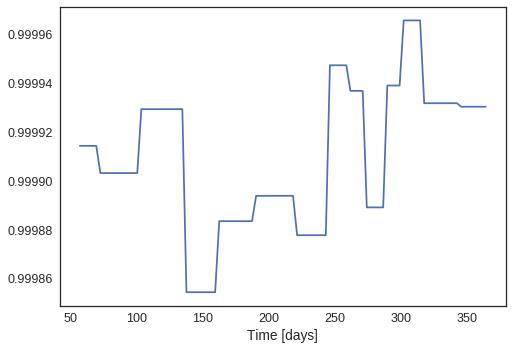

In [8]:
K = auxpars.loc['K', 'Value']
def food(t):
    X = tXi(t)
    return X / (K + X)

t = np.linspace(tX.index[0], tX.index[-1], 100)
plt.plot(t, food(t))
plt.xlabel('Time [days]')

## Solve DEB equations and make predictions

Applying dynamic temperature adjustment of rates


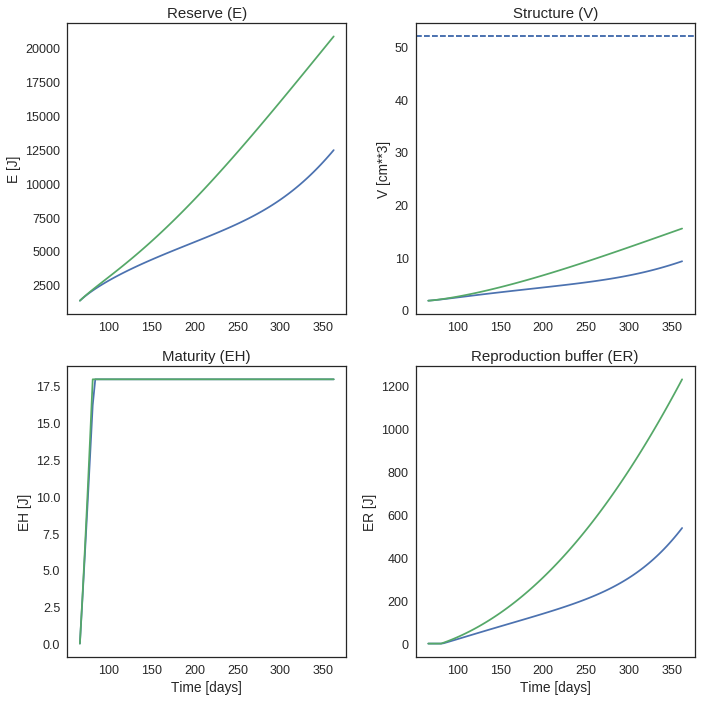

In [9]:
dm = deb.DEBStandard({'f': food, 'T': tTi}, pripars)
dm_notemp = deb.DEBStandard({'f': food}, pripars)

#dm.params['pAm'].set(value=81.)
#dm_notemp.params['pAm'].set(value=81.)

#Calculate initial reserve density from food level at first time
eV0 = tX.iloc[0] / (K + tX.iloc[0]) * imppars.loc['Em', 'Value']
#y0 = [50, tV.values[0], dm.params['EpH'], 0]

#Initial conditions, volume is measured volume at first data poitn
y0 = [eV0, tV.values[0], 0, 0]
#t = np.linspace(tV.index[0], np.round(tV.index[-1], -2), 100)
t = np.linspace(tV.index[0], tV.index[-1], 100)

#Make a prediction
dm.predict(y0, t)
dm_notemp.predict(y0, t)

#Plot state variables
fig = dm.plot_state()
fig = dm_notemp.plot_state(fig=fig)

#fig.axes[1].scatter(tV.index, tV.values)
#fig.axes[1].set_ylim(0, 15)
plt.tight_layout()

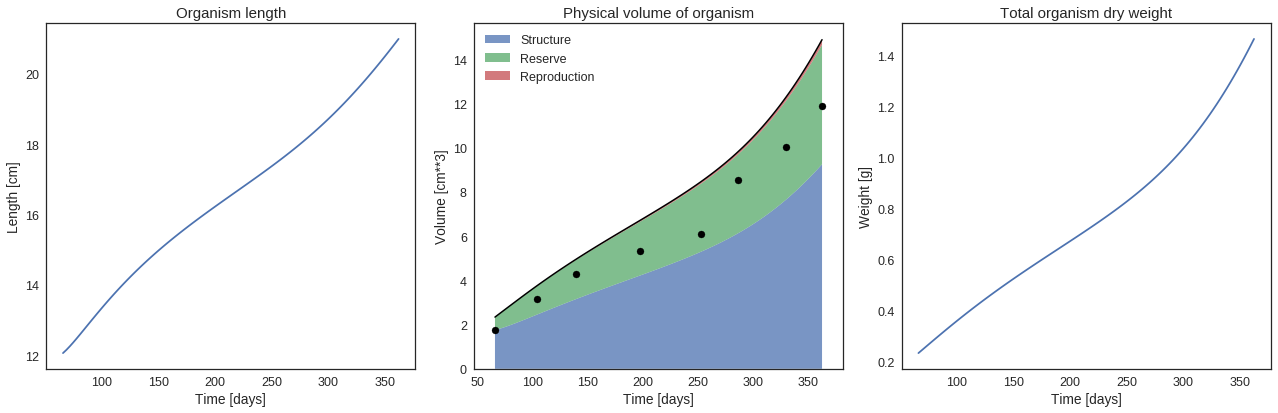

In [10]:
aux = deb_aux.AuxPars(dm)
fig = aux.plot_observables()
fig.axes[1].scatter(tV.index, tV.values, c='k')
plt.tight_layout()

## Test parameter optimization
* Release a single parameter ($\{\dot{p}_{Am}\}$) and run optimization to find best value given data.
* For now we just use the univariate volume data (no pseudodata).

In [11]:
aux = deb_aux.AuxPars(dm)
dm = deb.DEBStandard({'f': food, 'T': tTi}, pripars)

dm.params['pAm'].set(value=50., min=0.1, vary=True)
#dm.params['v'].set(value=0.1, min=1e-6, vary=True)
#dm.params['pM'].set(value=21., min=1, vary=True)


#Calculate initial reserve density from food level at first time
eV0 = tX.iloc[0] / (K + tX.iloc[0]) * imppars.loc['Em', 'Value']

#Initial conditions, volume is measured volume at first data poitn
y0 = [eV0, tV.values[0], 0, 0]

#Initial parameter estimation helper
debfit = deb.DEBFit(dm, y0, aux)

#Estimate (Nelder-Mead on SMSE)
res = debfit.fit([tV])

  0%|          | 0/3000 [00:00<?, ?it/s]

Applying dynamic temperature adjustment of rates


/home/raymondne/anaconda3/envs/epytox/lib/python3.6/site-packages/scipy/integrate/_ode.py:1213: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  'Unexpected istate=%s' % istate))
  5%|▍         | 142/3000 [00:16<02:52, 16.57it/s]/home/raymondne/anaconda3/envs/epytox/lib/python3.6/site-packages/lmfit/minimizer.py:598: RuntimeWarning: divide by zero encountered in double_scalars
  result.redchi = result.chisqr / result.nfree
  5%|▍         | 144/3000 [00:16<05:32,  8.60it/s]


In [12]:
import lmfit
lmfit.report_fit(res)

[[Fit Statistics]]
    # function evals   = 144
    # data points      = 1
    # variables        = 1
    chi-square         = 0.001
    reduced chi-square = inf
    Akaike info crit   = -5.490
    Bayesian info crit = -7.490
[[Variables]]
    Fm:       6.5 (fixed)
    kappaX:   0.8 (fixed)
    pAm:      70.5873271 (init= 50)
    v:        0.060315 (fixed)
    kappa:    0.98229 (fixed)
    kappaR:   0.475 (fixed)
    pM:       21.3497 (fixed)
    pT:       0 (fixed)
    kJ:       0.002 (fixed)
    EG:       1532.38 (fixed)
    EbH:      0.02261 (fixed)
    EpH:      17.94 (fixed)
    TA:       4000 (fixed)
    Ts:       293.15 (fixed)
[[Correlations]] (unreported correlations are <  0.100)


### Compare state variable predictions before and after fit

Applying dynamic temperature adjustment of rates


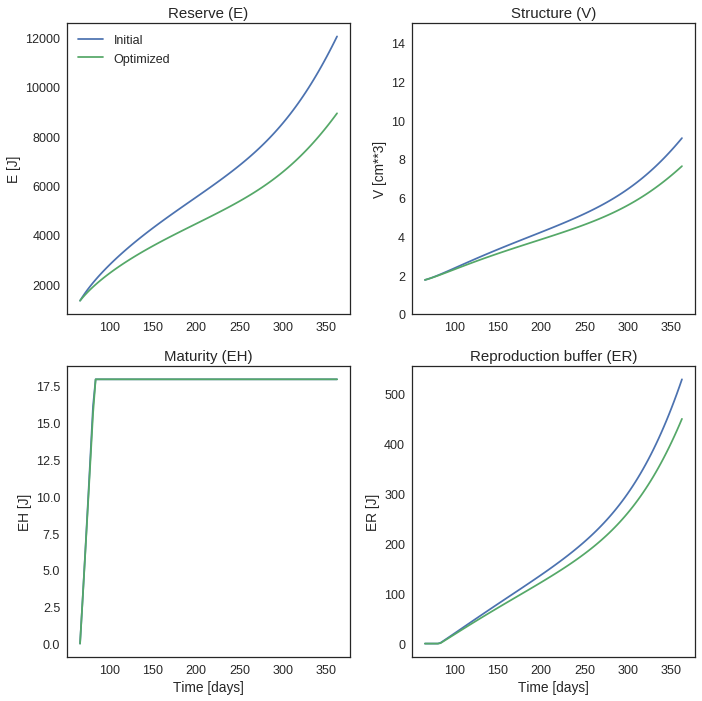

In [13]:
dm = deb.DEBStandard({'f': food, 'T': tTi}, pripars)

#Calculate initial reserve density from food level at first time
eV0 = tX.iloc[0] / (K + tX.iloc[0]) * imppars.loc['Em', 'Value']

#Initial conditions, volume is measured volume at first data poitn
y0 = [eV0, tV.values[0], 0, 0]
t = np.linspace(tV.index[0], tV.index[-1], 100)

fig = None
for pAm in [80, res.params['pAm'].value]:
    dm.params['pAm'].set(value=pAm)

    #Make a prediction
    dm.predict(y0, t)

    #Plot state variables
    fig = dm.plot_state(fig)

fig.axes[0].legend(['Initial', 'Optimized'], loc='best')

#fig.axes[1].scatter(tV.index, tV.values)
fig.axes[1].set_ylim(0, 15)
plt.tight_layout()

### Calculate and plot observables

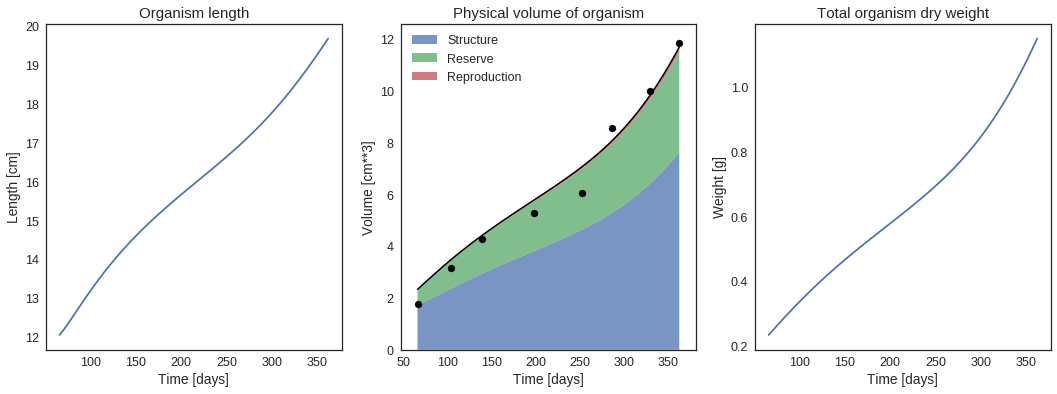

In [14]:
aux = deb_aux.AuxPars(dm)
fig = aux.plot_observables()
fig.axes[1].scatter(tV.index, tV.values, c='k')